In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/aaranyak/Documents/ml_projects/ml_projects/Uber Rides Data Analysis /UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.shape

(1156, 7)

In [4]:
df.info()  # all the columns except for MILES are object type and PURPOSE column has null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
df.describe().T  # only miles is of float data type.

,count,mean,std,min,25%,50%,75%,max
MILES,1156.0,21.115398,359.299007,0.5,2.9,6.0,10.4,12204.7


In [7]:
# now we have to fill the null values in PURPOSE column with not keyword.
df['PURPOSE'].fillna("NOT",inplace=True)  # inplace enables you to modify directly.

In [8]:
# now we have to change the start date and end date to date time format.
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')  # here errors = 'coerce means that when you try to convert a specific data into some other format an error comes.And to resolve that the coerce will put Nat-> not a time(for invalid time data.)

df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce')

In [9]:
# splitting the start date to date and time and then converting the time into different time-stamps.
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

# changing into categories of day and night.
df['day-night'] = pd.cut(x=df['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [10]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [12]:
df.shape

(1156, 10)

In [13]:
# checking for null values again.
df.isnull().sum()

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
date          735
time          735
day-night     742
dtype: int64

In [14]:
# as we can see there are a lot of null values so we have to remove them.
df.dropna(inplace=True)

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1043    False
1044    False
1045    False
1046    False
1047    False
Length: 413, dtype: bool

In [16]:
df.drop_duplicates(inplace=True)

In [18]:
# now we will check for unique values in dataframe columns with datatype object.

obj = (df.dtypes == 'object')  # In this we get a boolean series of all the columns -> true if column is of object dtype else false.
object_cols = list(obj[obj].index)  # this creates a list of the index of all the columns of object datatype.

unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size

unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

In [25]:
if pd.api.types.is_categorical_dtype(df['CATEGORY']):
    print("categorical")
elif pd.api.types.is_numeric_dtype(df['CATEGORY']):
    print("numerical")
else:
    print("another dtype")


another dtype


In [26]:
if pd.api.types.is_categorical_dtype(df['PURPOSE']):
    print("categorical")
elif pd.api.types.is_numeric_dtype(df['PURPOSE']):
    print("numerical")
else:
    print("another dtype")

another dtype


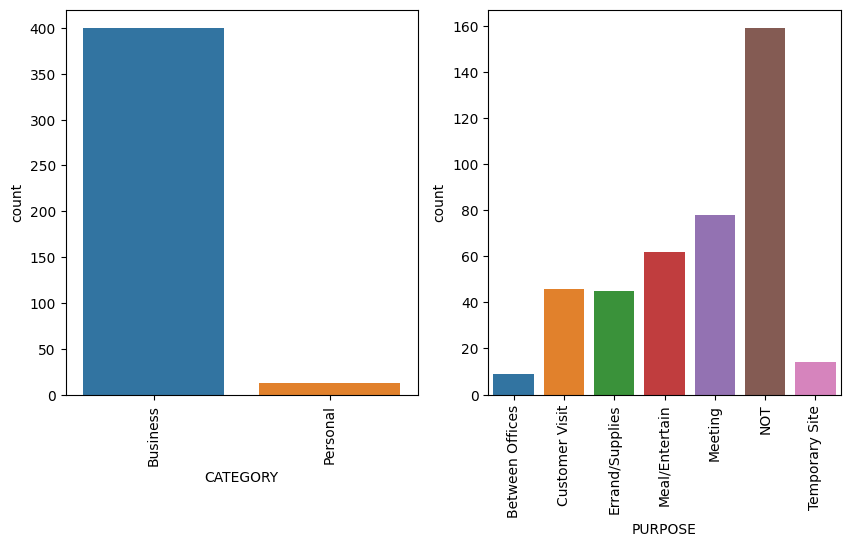

In [27]:
# now we will use matplotlib and seaborn to countplot the columns - PURPOSE and CATEGORY
df['CATEGORY'] = df['CATEGORY'].astype('category') # converted to categorical columns.
df['PURPOSE'] = df['PURPOSE'].astype('category')

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data = df,x = 'CATEGORY')  # sns.countplot() only takes categorical columns.
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data = df,x = 'PURPOSE')
plt.xticks(rotation=90)

plt.show()

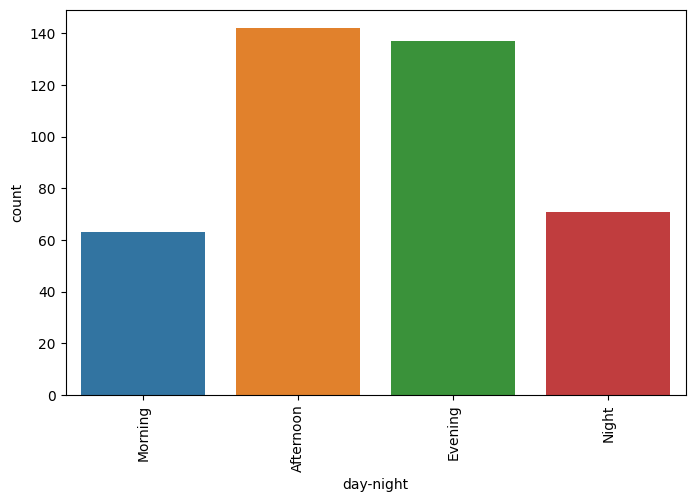

In [30]:
# let's do the same for time column.

df['day-night'] = df['day-night'].astype('category')

plt.figure(figsize=(8,5))
sns.countplot(data=df,x='day-night')
plt.xticks(rotation=90)

plt.show()

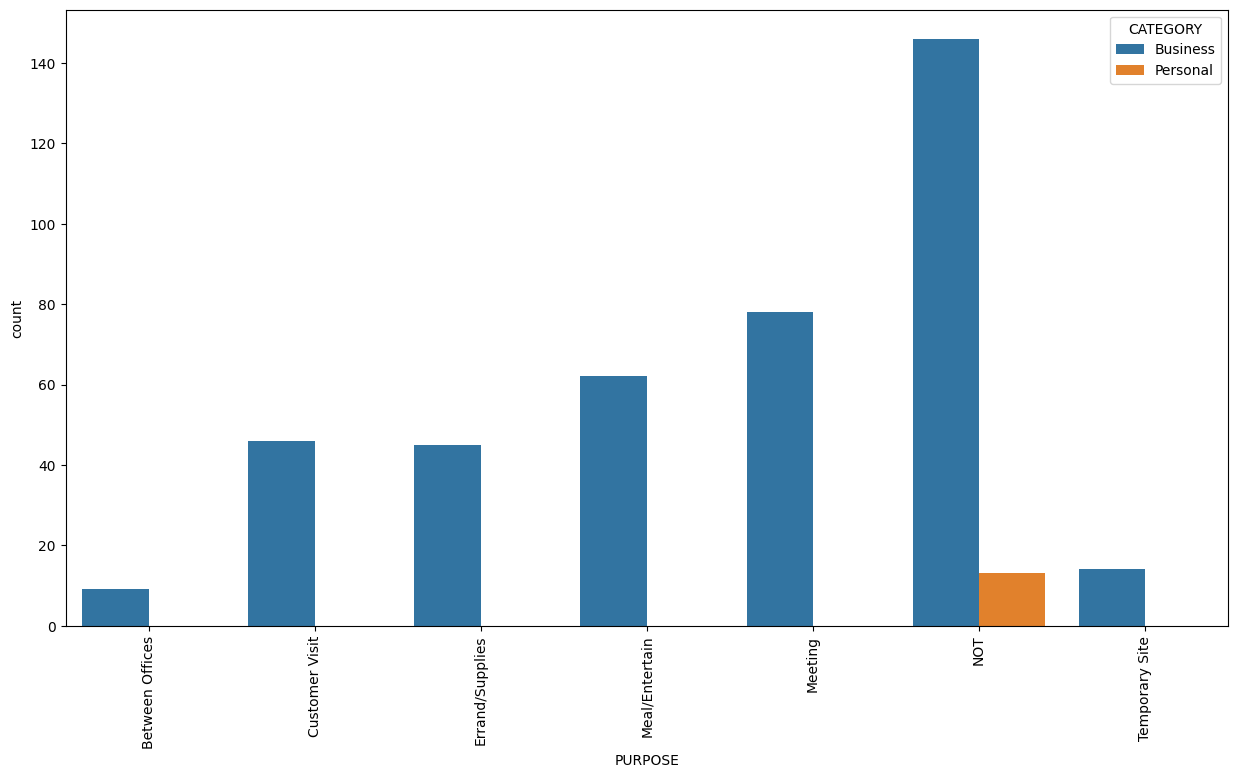

In [31]:
# now we will compare the two different categories along with the purpose of uber ride.

plt.figure(figsize=(15,8))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY') # the column inside the hue will be used for grouping inside the plot.
plt.xticks(rotation=90)
plt.show()